 # Erasing the Forbidden City with Filters

In [1]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [3]:
from skimage import data

#print(photo_data.size)

## Locating some pixels on the red wall...

(1442, 2560, 4)

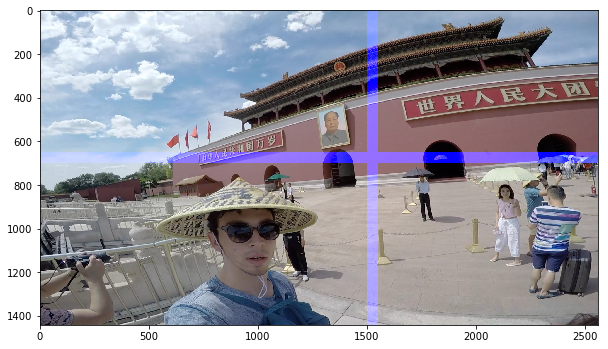

In [4]:
photo_data = misc.imread("Desktop/andrew.jpg")

plt.figure(figsize=(10,10))
photo_data[650:700,:,2] = 255
photo_data[:,1500:1550,2] = 255
plt.imshow(photo_data)
photo_data.shape

## Looking up the rgb values of a point on the wall...

In [5]:
photo_data = misc.imread("Desktop/andrew.jpg")

photo_data[600,2500]

array([126,  89,  88, 255], dtype=uint8)

## Combining filters to mask the red color of the wall...

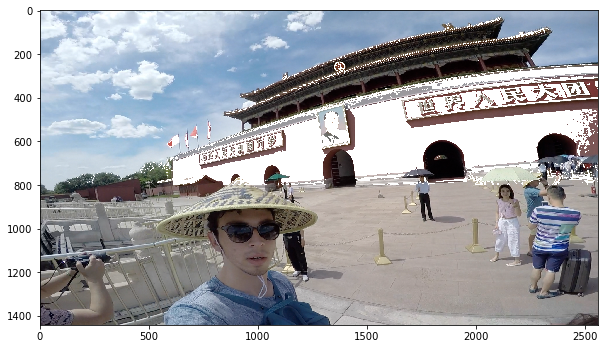

In [6]:
photo_data = misc.imread("Desktop/andrew.jpg")
plt.figure(figsize=(10,10))

total_rows, total_cols, total_layers = photo_data.shape

X, Y = np.ogrid[:total_rows, :total_cols]


red_filter_lower = photo_data[:,:,0]>125
red_filter_upper = photo_data[:,:,0]<185
red_filter = np.logical_and(red_filter_lower, red_filter_upper)

blue_filter_lower = photo_data[:,:,2]>40
blue_filter_upper = photo_data[:,:,2]<155
blue_filter = np.logical_and(blue_filter_lower, blue_filter_upper)

purple_filter = np.logical_and(red_filter, blue_filter)

upperhalf_filter = X<800

wall_filter = np.logical_and(purple_filter, upperhalf_filter)

photo_data[wall_filter] = 0

#print(photo_data[550,1550,:])


plt.imshow(photo_data)
